<center><b><font size=10>Data Mining Project - Final</font></b></center>
<center><b><font color='red' size=5>Catalog Cross-Selling</font></b></center>

---
### An Introduction To The Project. "Background"
* #### Exeter, Inc. is a catalog firm that sells products in a number of different catalogs that it owns. The catalogs number in the dozens, but fall into nine basic categories:
    1. ##### Clothing
    2. ##### Housewares
    3. ##### Health
    4. ##### Automotive
    5. ##### Personal electronics
    6. ##### Computers
    7. ##### Garden
    8. ##### Novelty gift
    9. ##### Jewelry
* #### The costs of printing and distributing catalogs are high.
* #### By far the biggest cost of operation is the cost of promoting products to people who buy nothing.
* #### Having invested so much in the production of artwork and printing of catalogs, Exeter wants to take every opportunity to use them effectively.
* #### One such opportunity is in cross-selling—once a customer has “taken the bait” and purchases one product, try to sell them another while you have their attention.
* #### Such cross-promotion might take the form of enclosing a catalog in the shipment of a purchased product, together with a discount coupon to induce a purchase from that catalog. Or, it might take the form of a similar coupon sent by e-mail, with a link to the web version of that catalog.
* #### But which catalog should be enclosed in the box or included as a link in the e-mail with the discount coupon? Exeter would like it to be an informed choice—a catalog that has a higher probability of inducing a purchase than simply choosing a catalog at random.
---
- ## What Is The Expected Content Of This Project?
    * #### We will mainly perform an `Association Rules` Analysis, and comment on the results in the `conclusions`.
    * #### We will also provide interpretations in English of the meanings of the various output statistics (lift ratio, confidence,support).
    * ####  Finally, include a very rough estimate (precise calculations are not necessary) of the extent to which this will help Exeter make an informed choice about which catalog to cross-promote to a purchaser.
---
- ## Table Of Contents:
    1. #### Importing Necessary Packages. [Go to T.1](#T.1)
    2. #### Exploratory Data Analysis. [Go to T.2](#T.2)
    3. #### Preprocessing The Data. [Go to T.3](#T.3)
    4. #### Build The Association Rules Approach. [Go to T.4](#T.4)
    5. #### Conclusions. [Go to T.5](#T.5)

---
<a id="T.1"></a>
### Importing Necessary Packages:
- #### We May Need Some Of The Following Packages, And Modules: 
    * ##### Numpy.
    * ##### Pandas.
    * ##### Seaborn, MatplotLib.
    * ##### Mlxtend.
    * ##### Sk-Learn "Science Kit Learn".

In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

C:\Users\Ameer\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\Ameer\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


---
<a id="T.2"></a>
### Exploratory Data Analysis:
- #### In This Part, We Will:
    * ##### Read The Data.
    * ##### Have A General Look At It "Show Some Samples From It".
    * ##### Take A Look At The Information Of The Data.
    * ##### Get The Unique Values For The Desired Columns.
    * ##### Do Some Graphs, To Understand The Data More and More.

In [2]:
data = pd.read_csv('..//Datasets//dmba-datasets//dmba//CatalogCrossSell.csv')
data.head()

,Customer Number,Clothing Division,Housewares Division,Health Products Division,Automotive Division,Personal Electronics Division,Computers Division,Garden Division,Novelty Gift Division,Jewelry Division
0,11569,0,1,1,1,1,0,0,1,0
1,13714,0,1,1,1,1,0,1,1,1
2,46391,0,1,1,1,1,0,1,1,1
3,67264,0,0,1,1,1,0,1,1,0
4,67363,0,0,1,0,1,0,1,1,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Customer Number                4998 non-null   int64
 1   Clothing Division              4998 non-null   int64
 2   Housewares Division            4998 non-null   int64
 3   Health Products Division       4998 non-null   int64
 4   Automotive Division            4998 non-null   int64
 5   Personal Electronics Division  4998 non-null   int64
 6   Computers Division             4998 non-null   int64
 7   Garden Division                4998 non-null   int64
 8   Novelty Gift Division          4998 non-null   int64
 9   Jewelry Division               4998 non-null   int64
dtypes: int64(10)
memory usage: 390.6 KB


---
* #### From the results up, we can conclude the following:
    - ##### The Data consists of `4998` row, and `10` columns.
    - ##### The Data Types of each column is assigned correctly `No need to correct the data types of columns`.
    - ##### The Data doesn't have any `missing - null` values.
    - ##### The values of the columns make us know that:
        + ###### `Customer Number` column can be considered as `Continous` variable.
        + ###### Rest of the columns are `Categorical` variables.
    - ##### `Customer Number` column is not necessary for our `Association Rules` Analysis, so for the sake of simplicity, we can drop this column, and move on with the rest columns `Since they are the 9 categories mentioned about the data`.

In [4]:
data.drop(['Customer Number'], axis=1, inplace= True)
for col in data.columns:
    print("Unique Values For '" + col + "' Are:",np.unique(data[col]).tolist())
    print('-' * 50)

Unique Values For 'Clothing Division' Are: [0, 1]
--------------------------------------------------
Unique Values For 'Housewares Division' Are: [0, 1]
--------------------------------------------------
Unique Values For 'Health Products Division' Are: [1]
--------------------------------------------------
Unique Values For 'Automotive Division' Are: [0, 1]
--------------------------------------------------
Unique Values For 'Personal Electronics Division' Are: [0, 1]
--------------------------------------------------
Unique Values For 'Computers Division' Are: [0, 1]
--------------------------------------------------
Unique Values For 'Garden Division' Are: [0, 1]
--------------------------------------------------
Unique Values For 'Novelty Gift Division' Are: [0, 1]
--------------------------------------------------
Unique Values For 'Jewelry Division' Are: [0, 1]
--------------------------------------------------


<AxesSubplot:>

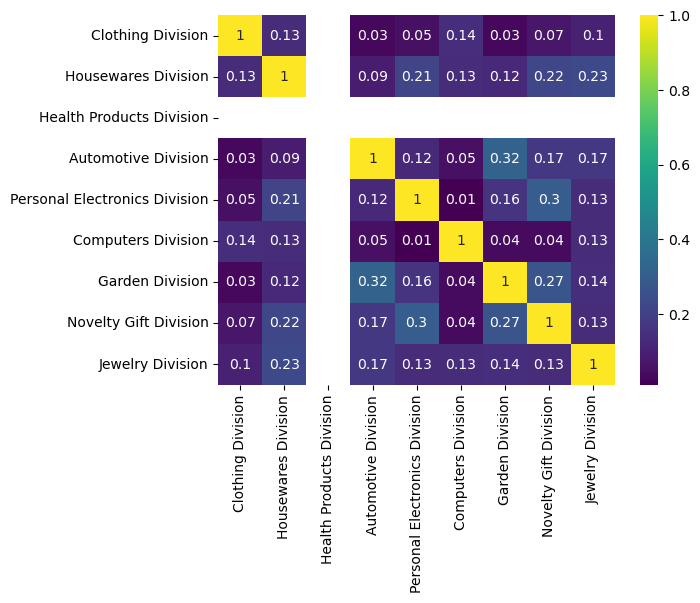

In [5]:
sns.heatmap(round(data.corr(), 2), annot= True, cmap='viridis')

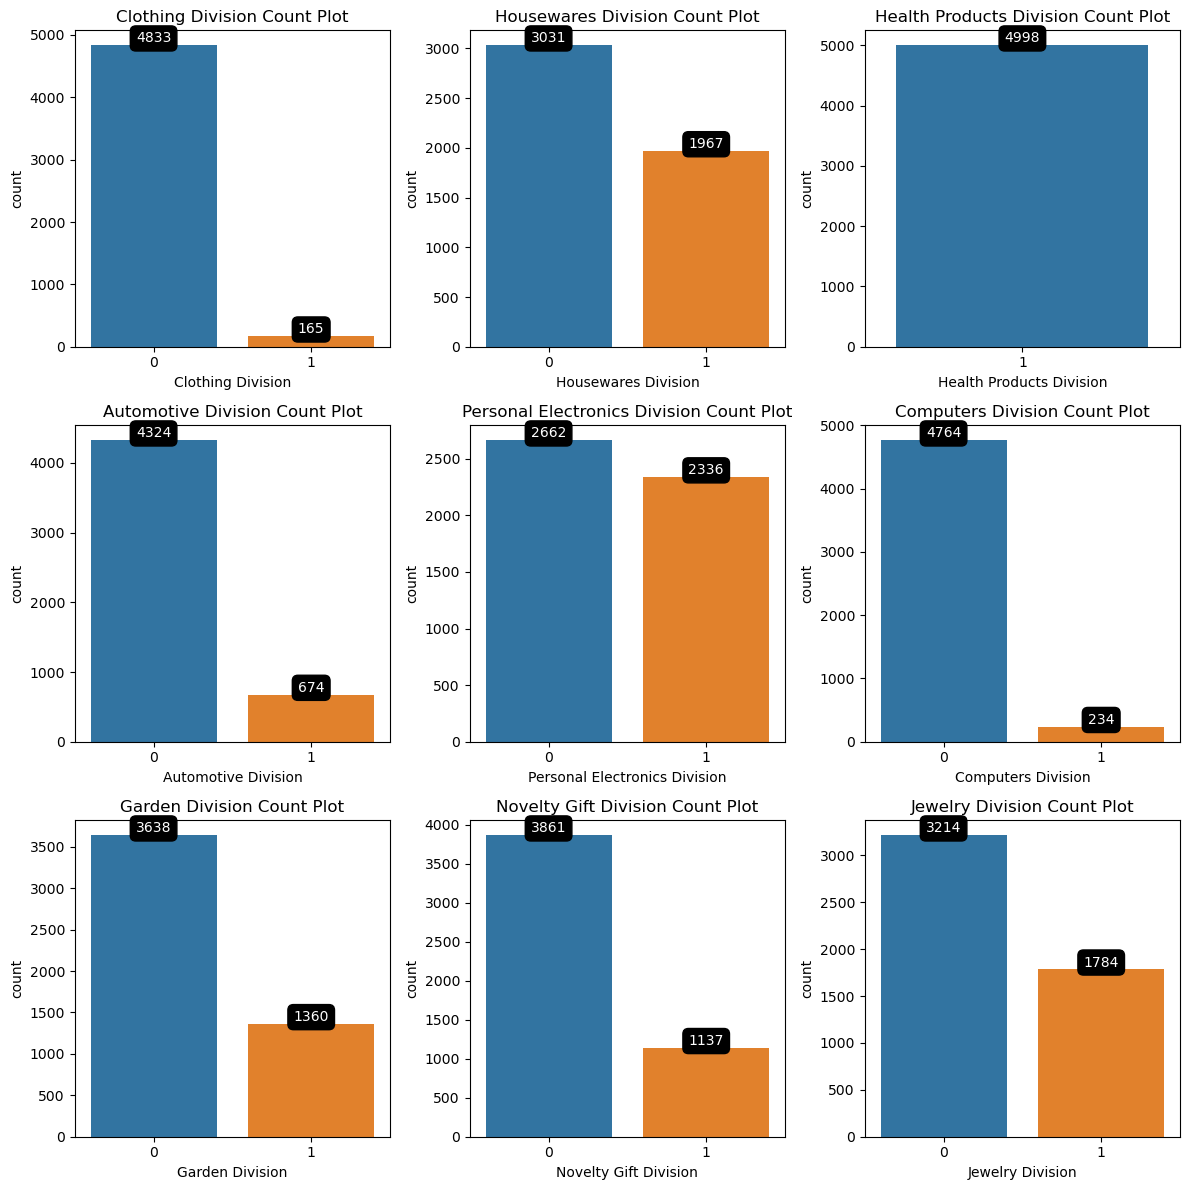

In [6]:
def add_bar_annotations(ax):
    for p in ax.patches:
        ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', color='white',
                 bbox=dict(facecolor='black', edgecolor='black', boxstyle='round,pad=0.4'))

# Create a 3x3 subplot grid
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Flatten the axes array to iterate over them
axes = axes.flatten()

# Iterate over each column in the DataFrame and create countplots with annotations
for i, col in enumerate(data.columns):
    ax = axes[i]
    sns.countplot(x=col, data=data, ax=ax)
    ax.set_xlabel(col)
    ax.set_title(col + " Count Plot")
    add_bar_annotations(ax)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [7]:
for col in data.columns:
    proportion = round(data[col].value_counts(normalize=True) * 100)
    print("'" + col + "'", 'Proportion of Total Data:')
    print(proportion)
    print('-'*50)

'Clothing Division' Proportion of Total Data:
0    97.0
1     3.0
Name: Clothing Division, dtype: float64
--------------------------------------------------
'Housewares Division' Proportion of Total Data:
0    61.0
1    39.0
Name: Housewares Division, dtype: float64
--------------------------------------------------
'Health Products Division' Proportion of Total Data:
1    100.0
Name: Health Products Division, dtype: float64
--------------------------------------------------
'Automotive Division' Proportion of Total Data:
0    87.0
1    13.0
Name: Automotive Division, dtype: float64
--------------------------------------------------
'Personal Electronics Division' Proportion of Total Data:
0    53.0
1    47.0
Name: Personal Electronics Division, dtype: float64
--------------------------------------------------
'Computers Division' Proportion of Total Data:
0    95.0
1     5.0
Name: Computers Division, dtype: float64
--------------------------------------------------
'Garden Division' P

---
<a id="T.3"></a>
### Preprocessing The Data:
* #### For This Part, No Need For Any Preprocessing On The Data, Since Our Variables Are `Categorical`.

---
<a id="T.4"></a>
### Build The Association Rules Approach:
* #### In This Part, We Will:
    - ##### Implement & Generate The Association Rules By:
        + ###### Running Apriori Algorithm To Discover Frequent Itemsets `With minimum support of 0.1`.
        + ###### Generate Association Rules Using `association_rules` function `With 'Lift' metric, and minimum threshold to be set of 1`.

In [8]:
frequent_itemsets = apriori(data[data.columns], min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Housewares Division),(Health Products Division),0.393557,1.000000,0.393557,1.000000,1.000000,0.000000,inf,0.000000
1,(Health Products Division),(Housewares Division),1.000000,0.393557,0.393557,0.393557,1.000000,0.000000,1.000000,0.000000
2,(Housewares Division),(Personal Electronics Division),0.393557,0.467387,0.235494,0.598373,1.280252,0.051551,1.326139,0.360964
3,(Personal Electronics Division),(Housewares Division),0.467387,0.393557,0.235494,0.503853,1.280252,0.051551,1.222304,0.411000
4,(Housewares Division),(Garden Division),0.393557,0.272109,0.132853,0.337570,1.240569,0.025763,1.098820,0.319764
...,...,...,...,...,...,...,...,...,...,...
127,"(Health Products Division, Personal Electronic...","(Housewares Division, Jewelry Division)",0.467387,0.194878,0.132053,0.282534,1.449801,0.040969,1.122175,0.582506
128,(Housewares Division),"(Jewelry Division, Health Products Division, P...",0.393557,0.197479,0.132053,0.335536,1.699099,0.054333,1.207773,0.678469
129,(Jewelry Division),"(Housewares Division, Health Products Division...",0.356943,0.235494,0.132053,0.369955,1.570974,0.047995,1.213415,0.565194
130,(Health Products Division),"(Housewares Division, Jewelry Division, Person...",1.000000,0.132053,0.132053,0.132053,1.000000,0.000000,1.000000,0.000000


---
<a id="T.5"></a>
### Conclusions:
* #### Lift Ratio: The lift ratio measures the strength of the association between the antecedent and consequent of a rule. A lift ratio greater than 1 indicates a positive correlation, meaning that the presence of the antecedent increases the likelihood of the consequent. In this case, all lift values are greater than 1, indicating positive associations.

* #### Confidence: The confidence of a rule measures the conditional probability of the consequent given the antecedent. It represents the likelihood of the consequent occurring when the antecedent is present. Higher confidence values indicate stronger relationships. In the provided rules, the confidence values range from 0.132053 to 1, indicating varying degrees of confidence.

* #### Support: Support represents the frequency of occurrence of a specific combination of items (antecedent and consequent) in the dataset. It measures how frequently the rule is applicable. Higher support values indicate that the rule occurs more frequently in the dataset.

* #### Based on these statistics, we can interpret the associations between different divisions of catalogs. For example:

* #### The Health Products Division and Housewares Division have a strong association, with a lift of 1 and a confidence of 1. This means that customers who purchase from one division are highly likely to purchase from the other division as well.

* #### The Personal Electronics Division and Housewares Division also show a moderate association, with a lift of 1.28 and a confidence of 0.503853. This suggests that there is a tendency for customers who purchase personal electronics to also purchase items from the housewares division.

* #### The Garden Division and Housewares Division have a weak association, with a lift of 1.24 and a confidence of 0.488235. This indicates that there is a slight tendency for customers who purchase from the garden division to also purchase items from the housewares division.

* #### To make an informed choice about which catalog to cross-promote to a purchaser, Exeter can consider the discovered associations and the lift, confidence, and support values. They can focus on cross-promoting catalogs that have strong associations and high support values. Additionally, they can analyze the confidence values to understand the likelihood of a cross-purchase happening. However, it's important to note that these conclusions are based on a rough estimate, and further analysis and testing may be required for more accurate insights.